In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

variables


1.   df
2.   df_cat
3.   df_num
4.   df_num_scaled    array
5.   df_scaled
6.   df_pca           array
7.   pca_df
8.   df_final_num
9.   df_final


In [132]:
df=pd.read_csv('dataset.csv')

In [133]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [135]:
df["track_id"].duplicated().sum()

np.int64(24259)

In [136]:
df=df.drop_duplicates(subset="track_id")

In [137]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [138]:
df.dropna(subset=["artists", "album_name", "track_name"], inplace=True)

In [139]:

df = df.astype({
    "track_id": "string",
    "artists": "string",
    "album_name": "string",
    "track_name": "string",
    "track_genre": "string"
})


In [140]:
df=df[df["duration_ms"] > 0]

In [141]:

df=df[df["popularity"].between(0, 100)]


In [142]:

df=df[df["tempo"] > 0]

In [143]:

df=df[df["loudness"].between(-60, 0)]

In [144]:
audio_cols = [
    "danceability", "energy", "speechiness",
    "acousticness", "instrumentalness",
    "liveness", "valence"
]

for col in audio_cols:
    df=df[df[col].between(0, 1)]

In [145]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89515 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89515 non-null  int64  
 1   track_id          89515 non-null  string 
 2   artists           89515 non-null  string 
 3   album_name        89515 non-null  string 
 4   track_name        89515 non-null  string 
 5   popularity        89515 non-null  int64  
 6   duration_ms       89515 non-null  int64  
 7   explicit          89515 non-null  bool   
 8   danceability      89515 non-null  float64
 9   energy            89515 non-null  float64
 10  key               89515 non-null  int64  
 11  loudness          89515 non-null  float64
 12  mode              89515 non-null  int64  
 13  speechiness       89515 non-null  float64
 14  acousticness      89515 non-null  float64
 15  instrumentalness  89515 non-null  float64
 16  liveness          89515 non-null  float64
 1

In [146]:

df.to_csv("clean_music_data.csv", index=False)
print("Data cleaning complete")

Data cleaning complete


In [147]:

df.shape

(89515, 21)

In [148]:

df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89515.000000,89515.000000,8.951500e+04,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000,89515.000000
mean,53413.529744,33.194738,2.292610e+05,0.563161,0.635123,5.284086,-8.482169,0.636888,0.087511,0.328160,0.172531,0.216480,0.470350,122.257437,3.904251
std,33388.050935,20.594229,1.117802e+05,0.175246,0.255669,3.559361,5.174930,0.480900,0.113247,0.338159,0.323098,0.194308,0.262343,29.700100,0.423497
min,0.000000,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000
25%,23725.500000,19.000000,1.731605e+05,0.450000,0.458000,2.000000,-10.311000,0.000000,0.036000,0.017100,0.000000,0.098200,0.250000,99.499500,4.000000
50%,50621.000000,33.000000,2.133860e+05,0.576000,0.677000,5.000000,-7.180000,1.000000,0.049000,0.188000,0.000057,0.132000,0.458000,122.020000,4.000000
75%,80507.500000,49.000000,2.643600e+05,0.692000,0.853000,8.000000,-5.109000,1.000000,0.085900,0.625000,0.093700,0.278000,0.683000,140.082000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,-0.001000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [149]:


df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [150]:
features_num=['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
features_cat=['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']
df=df.drop(['Unnamed: 0'], axis=1)


In [151]:
df_cat=df[features_cat]

In [152]:
df["popularity"].mean()

np.float64(33.19473831201475)

<Figure size 2500x2500 with 0 Axes>

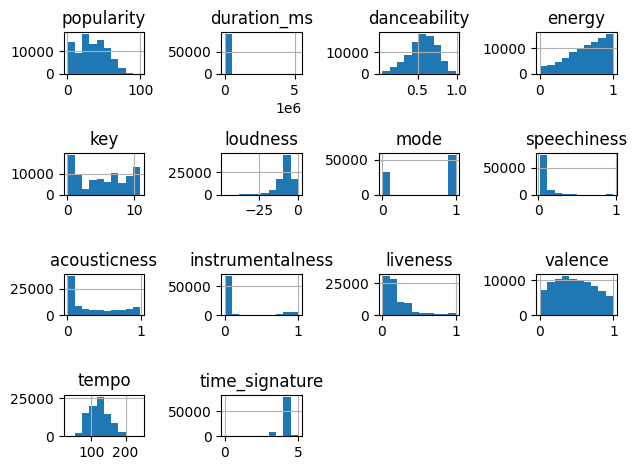

In [153]:
plt.figure(figsize=(25,25))
df.hist()
plt.tight_layout()
plt.show()

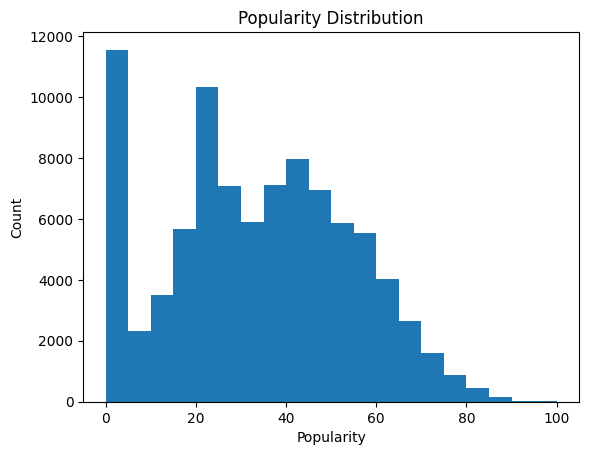

In [154]:
plt.hist(df["popularity"], bins=20)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [155]:
df.groupby("track_genre")["popularity"].mean().head()

,popularity
track_genre,
acoustic,42.483000
afrobeat,24.407407
alt-rock,33.896897
alternative,22.218673
ambient,44.168675


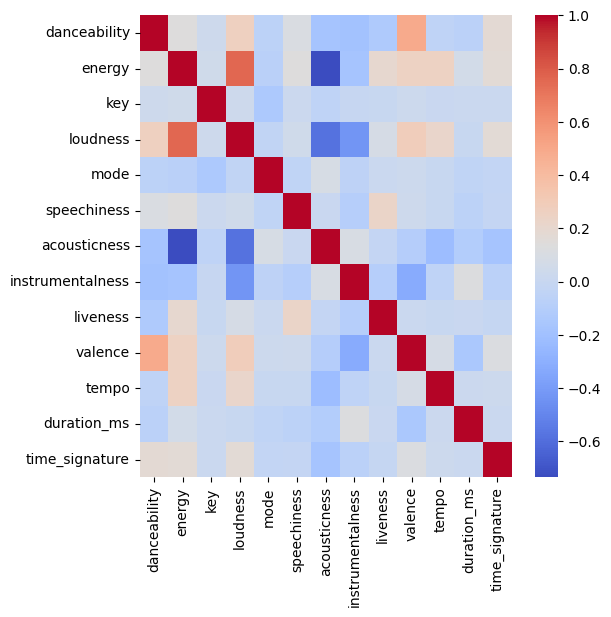

In [156]:
df_corr=df[features_num].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(df_corr, cmap='coolwarm')
plt.show()

Text(0, 0.5, 'loudness')

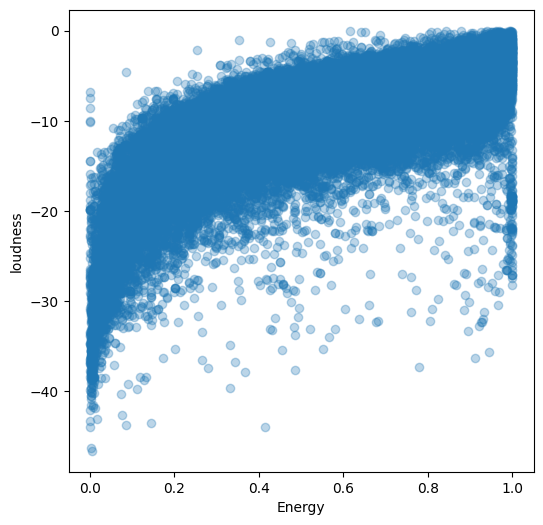

In [157]:
plt.figure(figsize=(6, 6))
plt.scatter(df["energy"], df["loudness"], alpha=0.3)
plt.xlabel("Energy")
plt.ylabel("loudness")

Text(0, 0.5, 'liveness')

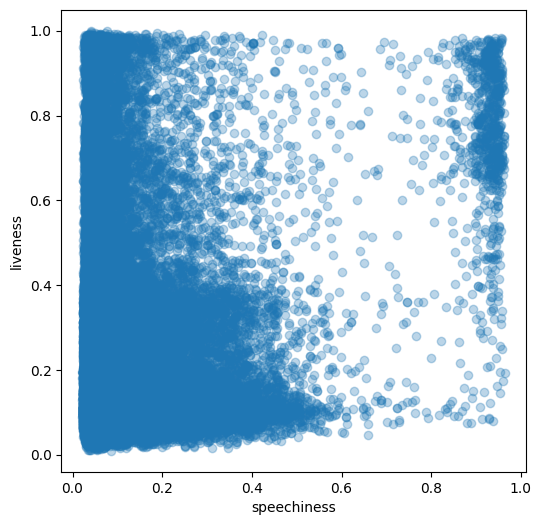

In [158]:
plt.figure(figsize=(6, 6))
plt.scatter(df["speechiness"], df["liveness"], alpha=0.3)
plt.xlabel("speechiness")
plt.ylabel("liveness")

Text(0, 0.5, 'valence')

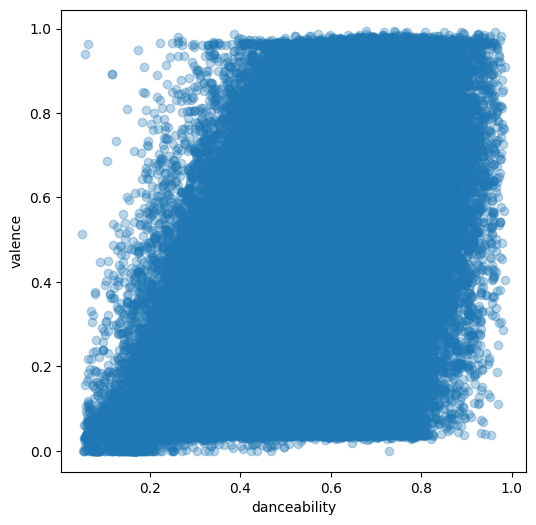

In [159]:
plt.figure(figsize=(6, 6))
plt.scatter(df["danceability"], df["valence"], alpha=0.3)
plt.xlabel("danceability")
plt.ylabel("valence")

In [160]:
df_num=df[features_num]
scale=StandardScaler()
df_num_scaled=scale.fit_transform(df_num)

In [161]:
df_num_scaled

array([[ 0.64389556, -0.68105032, -1.20361769, ..., -1.15624626,
         0.0125693 ,  0.22609318],
       [-0.81691985, -1.83489106, -1.20361769, ..., -1.50735816,
        -0.71257239,  0.22609318],
       [-0.71420627, -1.08000542, -1.48456853, ..., -1.54631447,
        -0.16492294,  0.22609318],
       ...,
       [ 0.37569898, -1.19734516, -1.48456853, ...,  0.34076045,
         0.37757351,  0.22609318],
       [ 0.13603395, -0.50504071,  0.48208735, ...,  0.46136678,
         0.4887477 ,  0.22609318],
       [-0.21205097, -0.57935588, -1.20361769, ..., -1.44981594,
         0.11240868,  0.22609318]])

In [162]:
df_scaled=pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [163]:
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.643896,-0.681050,-1.203618,0.335498,-1.324375,0.489985,-0.875214,-0.533991,0.728333,0.932564,-1.156246,0.012569,0.226093
1,-0.816920,-1.834891,-1.203618,-1.691401,0.755073,-0.098995,1.762021,-0.533977,-0.594316,-0.775135,-1.507358,-0.712572,0.226093
2,-0.714206,-1.080005,-1.484569,-0.241904,0.755073,-0.280899,-0.349423,-0.533994,-0.511972,-1.335473,-1.546314,-0.164923,0.226093
3,-1.695692,-2.251056,-1.484569,-1.938748,0.755073,-0.452207,1.705834,-0.533776,-0.434775,-1.247801,2.002784,-0.244481,-2.135210
4,0.312930,-0.751454,-0.922667,-0.231663,0.755073,-0.308273,0.416493,-0.533994,-0.687468,-1.156317,-0.077725,-0.272036,0.226093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89510,-2.232085,-1.565010,-0.079814,-1.528692,0.755073,-0.400108,0.922175,2.338218,-0.669970,-1.663672,0.125844,1.393260,2.587397
89511,-2.220672,-2.026546,-1.484569,-1.900680,-1.324375,-0.418652,1.969025,2.486781,-0.573730,-1.659479,-1.246415,1.393269,0.226093
89512,0.375699,-1.197345,-1.484569,-0.466257,-1.324375,-0.401874,1.593460,-0.533994,-0.682321,1.039295,0.340760,0.377574,0.226093
89513,0.136034,-0.505041,0.482087,-0.465097,0.755073,-0.510487,0.156259,-0.533994,0.275442,-0.218608,0.461367,0.488748,0.226093


In [164]:
n=10
pca=PCA(n_components=n)
df_pca=pca.fit_transform(df_scaled)
df_pca

array([[ 0.7355105 ,  0.91888101,  0.32711787, ..., -0.97559553,
        -0.95041534,  0.36604146],
       [-3.20798247,  1.45726675,  0.36967943, ..., -0.87636098,
        -0.35370244, -0.94029772],
       [-1.35664255,  0.01851241,  0.05661569, ..., -1.59894447,
         0.14287995, -1.10691344],
       ...,
       [-0.96850849,  1.44880785, -0.75982151, ...,  0.35844365,
        -2.20295145, -0.11995474],
       [-0.35563299,  0.06089344, -0.09861586, ...,  0.7856819 ,
        -0.27948038, -0.09280091],
       [-0.83232325,  1.29548239, -0.43401889, ..., -1.06056611,
        -1.34832535, -0.22278706]])

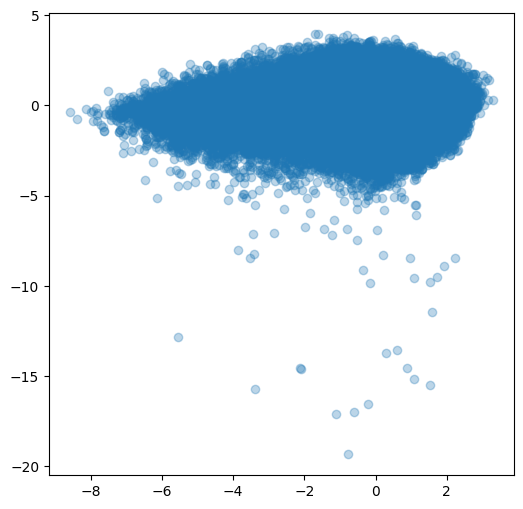

In [165]:
plt.figure(figsize=(6,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3)

In [166]:
pca_df = pd.DataFrame(
   df_pca,
    columns=[f"pc_{i+1}" for i in range (n)],
)


In [167]:
pca_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.735511,0.918881,0.327118,-0.681041,1.250834,-0.757452,-0.735153,-0.975596,-0.950415,0.366041
1,-3.207982,1.457267,0.369679,0.912066,0.791828,0.141124,0.365754,-0.876361,-0.353702,-0.940298
2,-1.356643,0.018512,0.056616,1.276333,1.207465,0.162850,-0.144016,-1.598944,0.142880,-1.106913
3,-3.688830,-0.246857,1.008395,2.195467,-2.028835,-0.899059,-0.514937,0.892944,-1.283816,-0.770345
4,-0.924321,0.435696,-0.275596,1.141231,0.345612,-0.160312,0.137720,-0.316813,-0.027352,-1.011513
...,...,...,...,...,...,...,...,...,...,...
89510,-3.301125,-2.099904,-1.265783,0.450770,1.829334,0.369665,2.324410,1.107609,-0.103546,-0.623867
89511,-4.831329,-1.674308,-0.708337,-0.409022,1.592049,-0.972616,-0.069761,-0.470262,-1.097769,-0.028007
89512,-0.968508,1.448808,-0.759822,0.182675,0.231722,-1.089702,-0.571459,0.358444,-2.202951,-0.119955
89513,-0.355633,0.060893,-0.098616,0.411420,-0.087559,0.962673,0.205784,0.785682,-0.279480,-0.092801


In [168]:
df_final_num=pd.concat([ df_num,pca_df], axis=1)

In [169]:
df_final_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,230666.0,4.0,0.735511,0.918881,0.327118,-0.681041,1.250834,-0.757452,-0.735153,-0.975596,-0.950415,0.366041
1,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,149610.0,4.0,-3.207982,1.457267,0.369679,0.912066,0.791828,0.141124,0.365754,-0.876361,-0.353702,-0.940298
2,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,210826.0,4.0,-1.356643,0.018512,0.056616,1.276333,1.207465,0.162850,-0.144016,-1.598944,0.142880,-1.106913
3,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,201933.0,3.0,-3.688830,-0.246857,1.008395,2.195467,-2.028835,-0.899059,-0.514937,0.892944,-1.283816,-0.770345
4,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853.0,4.0,-0.924321,0.435696,-0.275596,1.141231,0.345612,-0.160312,0.137720,-0.316813,-0.027352,-1.011513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.301125,-2.099904,-1.265783,0.450770,1.829334,0.369665,2.324410,1.107609,-0.103546,-0.623867
89511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.831329,-1.674308,-0.708337,-0.409022,1.592049,-0.972616,-0.069761,-0.470262,-1.097769,-0.028007
89512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.968508,1.448808,-0.759822,0.182675,0.231722,-1.089702,-0.571459,0.358444,-2.202951,-0.119955
89513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.355633,0.060893,-0.098616,0.411420,-0.087559,0.962673,0.205784,0.785682,-0.279480,-0.092801


In [170]:
df_final=pd.concat([df_final_num, df_cat], axis=1)
df_final.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,track_id,artists,album_name,track_name,explicit,track_genre
0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,230666.0,4.0,0.735511,0.918881,0.327118,-0.681041,1.250834,-0.757452,-0.735153,-0.975596,-0.950415,0.366041,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,149610.0,4.0,-3.207982,1.457267,0.369679,0.912066,0.791828,0.141124,0.365754,-0.876361,-0.353702,-0.940298,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,210826.0,4.0,-1.356643,0.018512,0.056616,1.276333,1.207465,0.162850,-0.144016,-1.598944,0.142880,-1.106913,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,201933.0,3.0,-3.688830,-0.246857,1.008395,2.195467,-2.028835,-0.899059,-0.514937,0.892944,-1.283816,-0.770345,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic
4,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,198853.0,4.0,-0.924321,0.435696,-0.275596,1.141231,0.345612,-0.160312,0.137720,-0.316813,-0.027352,-1.011513,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic
5,0.688,0.4810,6.0,-8.807,1.0,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,214240.0,4.0,0.126548,1.375607,-0.103175,0.085578,0.479163,0.628201,-0.168670,0.087661,0.464244,-0.079198,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,False,acoustic
6,0.407,0.1470,2.0,-8.822,1.0,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,229400.0,3.0,-2.621607,-0.040889,0.632997,1.612190,-1.463538,-0.104611,-1.209391,-0.030340,-0.512232,-1.093017,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,False,acoustic
7,0.703,0.4440,11.0,-9.331,1.0,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,242946.0,4.0,0.035040,1.238738,-0.876387,-0.109781,-1.067578,1.099039,0.344377,1.630160,0.038471,-0.140990,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,False,acoustic
8,0.625,0.4140,0.0,-8.700,1.0,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,189613.0,4.0,-0.038648,1.153473,-0.259989,1.614699,0.326695,-0.497519,-0.053137,0.072795,-0.465304,0.044082,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,False,acoustic
9,0.442,0.6320,1.0,-6.770,1.0,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,205594.0,4.0,-0.734793,0.041032,-0.083387,1.298109,0.896943,0.376863,-0.154535,-1.639669,0.200879,-0.990332,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,False,acoustic
